In [2]:
from __future__ import print_function #for compatibility beteen python2 and python3
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
try:
    import urllib2 as urllib
except ImportError:
    import urllib as urlb
import os
import sys
import io
from pandas import Series

In [2]:
# changed the .zip to .cvs in files
# !curl https://data.cityofnewyork.us/api/views/57mv-nv28/rows.csv?accessType=DOWNLOAD > crime_nyc.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1494M    0 1494M    0     0  2904k      0 --:--:--  0:08:46 --:--:-- 2852k  0 --:--:--  0:00:06 --:--:-- 2790k    0  194M    0     0  2886k      0 --:--:--  0:01:09 --:--:-- 2888k283M    0     0  2900k      0 --:--:--  0:01:40 --:--:-- 2965k3009k442M    0     0  2906k      0 --:--:--  0:02:36 --:--:-- 2900k     0 --:--:--  0:07:42 --:--:-- 2778k9M    0     0  2904k      0 --:--:--  0:07:45 --:--:-- 2921k


In [4]:
crime_nyc = pd.read_csv('crime_nyc.csv', infer_datetime_format=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
crime_nyc.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,849201806,03/06/2013,10:00:00,03/06/2013,10:05:00,03/12/2013,112,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",...,90.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1004061.0,196693.0,40.706540,-73.928547,"(40.706539649, -73.928546994)"
1,502279651,03/06/2013,03:30:00,03/06/2013,03:35:00,03/12/2013,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",...,32.0,NaN,STREET,NaN,NaN,1000883.0,236356.0,40.815411,-73.939911,"(40.815410927, -73.939911295)"
2,917945135,03/05/2013,16:05:00,03/05/2013,16:07:00,03/12/2013,109,GRAND LARCENY,419.0,"LARCENY,GRAND FROM PERSON,UNCL",...,66.0,INSIDE,BANK,NaN,NaN,982493.0,171934.0,40.638604,-74.006332,"(40.63860374, -74.00633215)"
3,808470177,03/05/2013,15:00:00,NaN,NaN,03/12/2013,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,...,47.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1021403.0,261063.0,40.883162,-73.865642,"(40.883161804, -73.865641723)"
4,367579534,03/05/2013,14:30:00,03/05/2013,14:30:00,03/12/2013,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,...,46.0,FRONT OF,RESIDENCE - PUBLIC HOUSING,NaN,WEST TREMONT REHAB (GROUP 3),1006344.0,247971.0,40.847279,-73.920144,"(40.847278789, -73.920144058)"


In [6]:
crime_nyc.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')

murder and nonnegligent homicide, 
rape (legacy & revised), 
robbery, 
aggravated assault, 
burglary, 
motor vehicle theft, 
larceny-theft, 
arson

In [6]:
crime_nyc_part1 = crime_nyc[crime_nyc.OFNS_DESC.isin(['BURGLARY', 'ARSON', 'GRAND LARCENY', 'ROBBERY',
                                                    'GRAND LARCENY OF MOTOR VEHICLE', 'FELONY ASSAULT', 
                                                    'RAPE', 
                                                    'MURDER & NON-NEGL. MANSLAUGHTER'])]

In [7]:
crime_nyc_part1 = crime_nyc_part1[crime_nyc_part1.CMPLNT_FR_DT.str[-4:].isin(['2017', '2016', '2015', '2014', '2013', 
                                                                              '2012', '2011', '2010', '2009', '2008'])]

In [8]:
crime_nyc_part1['CMPLNT_FR_DT'] = pd.to_datetime(crime_nyc_part1['CMPLNT_FR_DT'])

In [8]:
crime_nyc_part1 = crime_nyc_part1.groupby(['CMPLNT_FR_DT',
                         'OFNS_DESC'])['OFNS_DESC'].count().unstack().reset_index().sort_values(by=['CMPLNT_FR_DT'])

In [9]:
crime_nyc_part1['CRIME_SUM'] = crime_nyc_part1[['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']].sum(axis = 1, skipna = True) 

In [10]:
crime_nyc_part1.head()

OFNS_DESC,CMPLNT_FR_DT,ARSON,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,ROBBERY,CRIME_SUM
0,2008-01-01,5.0,41.0,130.0,224.0,29.0,4.0,50.0,53.0,536.0
1,2008-01-02,8.0,55.0,24.0,102.0,35.0,1.0,2.0,49.0,276.0
2,2008-01-03,3.0,65.0,32.0,105.0,33.0,NaN,4.0,63.0,305.0
3,2008-01-04,4.0,71.0,35.0,131.0,38.0,3.0,6.0,61.0,349.0
4,2008-01-05,9.0,50.0,50.0,126.0,43.0,3.0,4.0,66.0,351.0


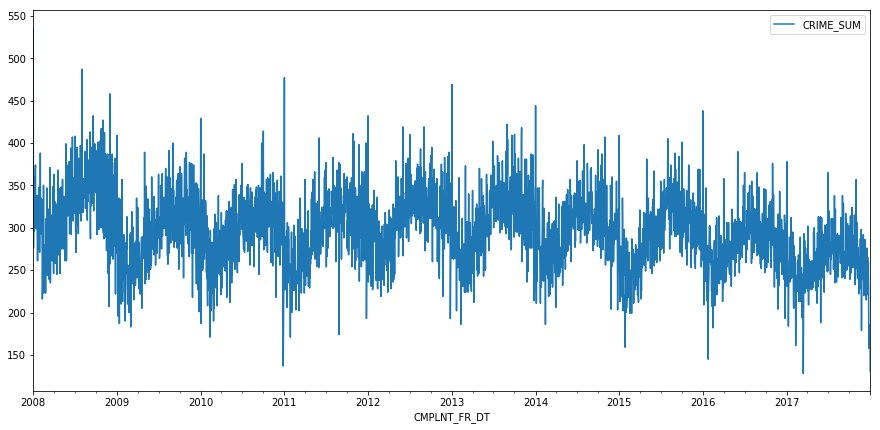

In [11]:
f, ax = plt.subplots(figsize=(15,7))
crime_nyc_part1.plot(x='CMPLNT_FR_DT', y='CRIME_SUM', ax=ax)
#ax.set_ylabel("")
plt.show()

In [36]:
crime_nyc_part1['Date'] = crime_nyc_part1['CMPLNT_FR_DT'] - pd.to_timedelta(7, unit='d')

In [39]:
crime_nyc_part1

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,Date
index_right,,,,,,,,,,,,,,,,,,,,,
1,502279651,2013-03-06,03:30:00,03/06/2013,03:35:00,03/12/2013,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",...,NaN,STREET,NaN,NaN,1000883.0,236356.0,40.815411,-73.939911,"(40.815410927, -73.939911295)",2013-02-27
2,917945135,2013-03-05,16:05:00,03/05/2013,16:07:00,03/12/2013,109,GRAND LARCENY,419.0,"LARCENY,GRAND FROM PERSON,UNCL",...,INSIDE,BANK,NaN,NaN,982493.0,171934.0,40.638604,-74.006332,"(40.63860374, -74.00633215)",2013-02-26
10,922701841,2013-03-05,13:00:00,03/05/2013,15:00:00,03/12/2013,109,GRAND LARCENY,405.0,"LARCENY,GRAND BY THEFT OF CREDIT CARD",...,FRONT OF,RESIDENCE-HOUSE,NaN,NaN,1028254.0,149548.0,40.577050,-73.841595,"(40.577049716, -73.841595141)",2013-02-26
21,477304889,2013-03-04,17:00:00,NaN,NaN,03/12/2013,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",...,INSIDE,RESIDENCE-HOUSE,NaN,NaN,989354.0,184406.0,40.672835,-73.981602,"(40.67283536, -73.981601607)",2013-02-25
23,359922234,2013-03-04,14:00:00,03/06/2013,22:00:00,03/12/2013,109,GRAND LARCENY,403.0,"LARCENY,GRAND BY BANK ACCT COMPROMISE-REPRODUC...",...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,999459.0,174711.0,40.646213,-73.945195,"(40.646213127, -73.945195116)",2013-02-25
25,934199846,2013-03-04,12:00:00,03/04/2013,13:00:00,03/12/2013,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",...,INSIDE,BANK,NaN,NaN,995554.0,184745.0,40.673760,-73.959250,"(40.673760094, -73.95925014)",2013-02-25
26,307017341,2013-03-04,12:00:00,03/06/2013,16:00:00,03/12/2013,109,GRAND LARCENY,403.0,"LARCENY,GRAND BY BANK ACCT COMPROMISE-REPRODUC...",...,INSIDE,COMMERCIAL BUILDING,NaN,NaN,986258.0,213675.0,40.753173,-73.992754,"(40.753173041, -73.992753912)",2013-02-25
30,618903385,2013-03-03,20:00:00,03/04/2013,00:05:00,03/12/2013,109,GRAND LARCENY,421.0,"LARCENY,GRAND FROM VEHICLE/MOTORCYCLE",...,NaN,AIRPORT TERMINAL,NaN,NaN,1046367.0,186986.0,40.679700,-73.776047,"(40.679700408, -73.776047368)",2013-02-24
43,778878250,2013-03-01,19:00:00,03/10/2013,11:00:00,03/12/2013,109,GRAND LARCENY,405.0,"LARCENY,GRAND BY THEFT OF CREDIT CARD",...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1011122.0,249556.0,40.851616,-73.902868,"(40.851615897, -73.902867934)",2013-02-22


In [12]:
crime_nyc_weekly = crime_nyc_part1.groupby([pd.Grouper(key='Date', 
                                    freq='W-MON')])['CRIME_SUM'].sum().reset_index().sort_values('Date')

In [17]:
crime_nyc_weekly.head()

,Date,CRIME_SUM
0,2007-12-31,2473.0
1,2008-01-07,2320.0
2,2008-01-14,2101.0
3,2008-01-21,2160.0
4,2008-01-28,2198.0


In [16]:
#crime_nyc_weekly.to_csv('nyc_weekly')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


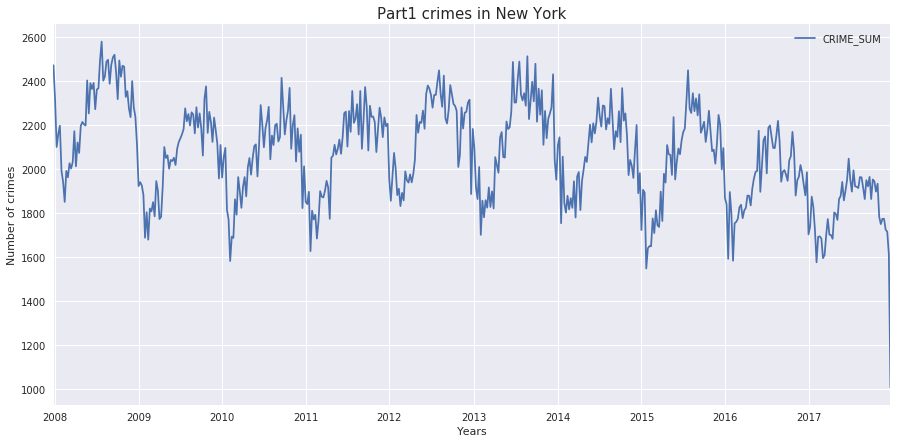

In [125]:
f, ax = plt.subplots(figsize=(15,7))
crime_nyc_weekly.plot(x='Date', y='CRIME_SUM', ax=ax)
#ax.set_ylabel("")
plt.title("Part1 crimes in New York", size=15)
plt.ylabel('Number of crimes')
plt.xlabel('Years')
plt.show()

In [ ]:
crime_nyc_part1[['CMPLNT_FR_DT',]]

len(set(crime_nyc.PD_DESC))

In [290]:
len(set(crime_nyc.OFNS_DESC))

71

### Crime Temporal & Making Gif

In [119]:
crime_nyc_temp = crime_nyc[crime_nyc.OFNS_DESC.isin(['BURGLARY', 'ARSON', 'GRAND LARCENY', 'ROBBERY',
                                                    'GRAND LARCENY OF MOTOR VEHICLE', 'FELONY ASSAULT', 
                                                    'RAPE', 
                                                    'MURDER & NON-NEGL. MANSLAUGHTER'])]

In [120]:
crime_nyc_temp = crime_nyc_temp[crime_nyc_temp.CMPLNT_FR_DT.str[-4:].isin(['2017', '2016', '2015', '2014', '2013', 
                                                                           '2012', '2011', '2010', '2009', '2008'])]

In [121]:
crime_nyc_temp['CMPLNT_FR_DT'] = pd.to_datetime(crime_nyc_temp['CMPLNT_FR_DT'])

In [22]:
crime_nyc_temp.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
1,502279651,2013-03-06,03:30:00,03/06/2013,03:35:00,03/12/2013,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",...,32.0,NaN,STREET,NaN,NaN,1000883.0,236356.0,40.815411,-73.939911,"(40.815410927, -73.939911295)"
2,917945135,2013-03-05,16:05:00,03/05/2013,16:07:00,03/12/2013,109,GRAND LARCENY,419.0,"LARCENY,GRAND FROM PERSON,UNCL",...,66.0,INSIDE,BANK,NaN,NaN,982493.0,171934.0,40.638604,-74.006332,"(40.63860374, -74.00633215)"
10,922701841,2013-03-05,13:00:00,03/05/2013,15:00:00,03/12/2013,109,GRAND LARCENY,405.0,"LARCENY,GRAND BY THEFT OF CREDIT CARD",...,100.0,FRONT OF,RESIDENCE-HOUSE,NaN,NaN,1028254.0,149548.0,40.577050,-73.841595,"(40.577049716, -73.841595141)"
21,477304889,2013-03-04,17:00:00,NaN,NaN,03/12/2013,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",...,78.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,989354.0,184406.0,40.672835,-73.981602,"(40.67283536, -73.981601607)"
23,359922234,2013-03-04,14:00:00,03/06/2013,22:00:00,03/12/2013,109,GRAND LARCENY,403.0,"LARCENY,GRAND BY BANK ACCT COMPROMISE-REPRODUC...",...,67.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,999459.0,174711.0,40.646213,-73.945195,"(40.646213127, -73.945195116)"


In [23]:
crime_nyc_temp = crime_nyc_temp[['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC',
                                 'Longitude', 'Latitude']]

In [26]:
import geopandas as gpd
import shapely
# combine lat and lon to one column
crime_nyc_temp['lonlat'] = list(zip(crime_nyc_temp.Longitude, crime_nyc_temp.Latitude))
# Create Point Geometry for based on lonlat column
crime_nyc_temp['geometry'] = crime_nyc_temp[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
crime_nyc_temp.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,Longitude,Latitude,lonlat,geometry
1,2013-03-06,03:30:00,ROBBERY,-73.939911,40.815411,"(-73.939911295, 40.815410927)",POINT (-73.939911295 40.81541092699999)
2,2013-03-05,16:05:00,GRAND LARCENY,-74.006332,40.638604,"(-74.00633215, 40.63860374)",POINT (-74.00633215000001 40.63860374)
10,2013-03-05,13:00:00,GRAND LARCENY,-73.841595,40.577050,"(-73.841595141, 40.577049716)",POINT (-73.841595141 40.577049716)
21,2013-03-04,17:00:00,GRAND LARCENY,-73.981602,40.672835,"(-73.981601607, 40.67283536)",POINT (-73.981601607 40.67283536)
23,2013-03-04,14:00:00,GRAND LARCENY,-73.945195,40.646213,"(-73.945195116, 40.646213127)",POINT (-73.94519511600001 40.646213127)


In [34]:
crime_nyc_temp = gpd.GeoDataFrame(crime_nyc_temp)

In [35]:
crime_nyc_temp.crs = from_epsg(4326)
crime_nyc_temp.crs

{'init': 'epsg:4326', 'no_defs': True}

In [36]:
crime_nyc_temp_with_tracks = gpd.sjoin(census_track, crime_nyc_temp, op='contains')

In [41]:
crime_nyc_temp_with_tracks.head(2)

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,index_right,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,Longitude,Latitude,lonlat
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,5704222,2013-11-04,08:14:00,ROBBERY,-74.082073,40.644215,"(-74.082073348, 40.64421516)"
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,3402500,2008-05-20,01:40:00,ROBBERY,-74.081943,40.644037,"(-74.081943405, 40.644036842)"


In [43]:
crime_temp = crime_nyc_temp_with_tracks[['boro_ct201', 'CMPLNT_FR_DT', 'OFNS_DESC']]

In [49]:
crime_temp['YEAR'] = crime_temp['CMPLNT_FR_DT'].dt.year
crime_temp['MONTH'] = crime_temp['CMPLNT_FR_DT'].dt.month

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [50]:
crime_temp.head()

,boro_ct201,CMPLNT_FR_DT,OFNS_DESC,YEAR,MONTH
0,5000900,2013-11-04,ROBBERY,2013,11
0,5000900,2008-05-20,ROBBERY,2008,5
0,5000900,2008-11-16,GRAND LARCENY,2008,11
0,5000900,2008-04-10,GRAND LARCENY,2008,4
0,5000900,2016-11-25,ROBBERY,2016,11


In [52]:
crime_temp_boro = crime_temp.groupby(['boro_ct201', 'YEAR'])['OFNS_DESC'].count().unstack().reset_index()

In [53]:
crime_temp_boro = crime_temp_boro.merge(census_track, left_on="boro_ct201", right_on='boro_ct201')
crime_temp_boro.head()

YEAR,boro_ct201,2008,2009,2010,2011,2012,2013,2014,2015,2016,...,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,1000201,27.0,24.0,26.0,31.0,34.0,18.0,37.0,39.0,33.0,...,Manhattan,E,000201,2.01,MN28,Lower East Side,3809,9.715994e+05,4748.325960,POLYGON ((-73.98449647076764 40.70950966393941...
1,1000202,48.0,35.0,50.0,42.0,53.0,43.0,28.0,38.0,42.0,...,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315114e+06,8568.089235,(POLYGON ((-73.98237340572007 40.7055433504376...
2,1000500,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.898377,(POLYGON ((-74.01092841268031 40.6844914725429...
3,1000600,91.0,92.0,75.0,90.0,98.0,89.0,100.0,94.0,90.0,...,Manhattan,E,000600,6,MN28,Lower East Side,3809,2.583418e+06,6970.634699,POLYGON ((-73.99022012603876 40.71440493989796...
4,1000700,121.0,101.0,84.0,68.0,81.0,79.0,82.0,96.0,88.0,...,Manhattan,I,000700,7,MN25,Battery Park City-Lower Manhattan,3810,2.442012e+06,9802.917997,(POLYGON ((-73.99799957540132 40.6987976855442...


In [65]:
crime_temp_boro = gpd.GeoDataFrame(crime_temp_boro)

In [78]:
crime_temp_boro = crime_temp_boro.rename(index=str, columns={2008: "2008"})

In [81]:
crime_temp_boro = crime_temp_boro.rename(index=str, columns={2009: "2009", 2010: "2010", 2011: "2011", 
                                                             2012: "2012", 2013: "2013", 2014: "2014",
                                                             2015: "2015", 2016: "2016", 2017: "2017"})

In [84]:
# save all the maps in the charts folder
output_path = 'charts/maps'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

In [83]:
# set the min and max range for the choropleth map
vmin, vmax = 0, 1000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


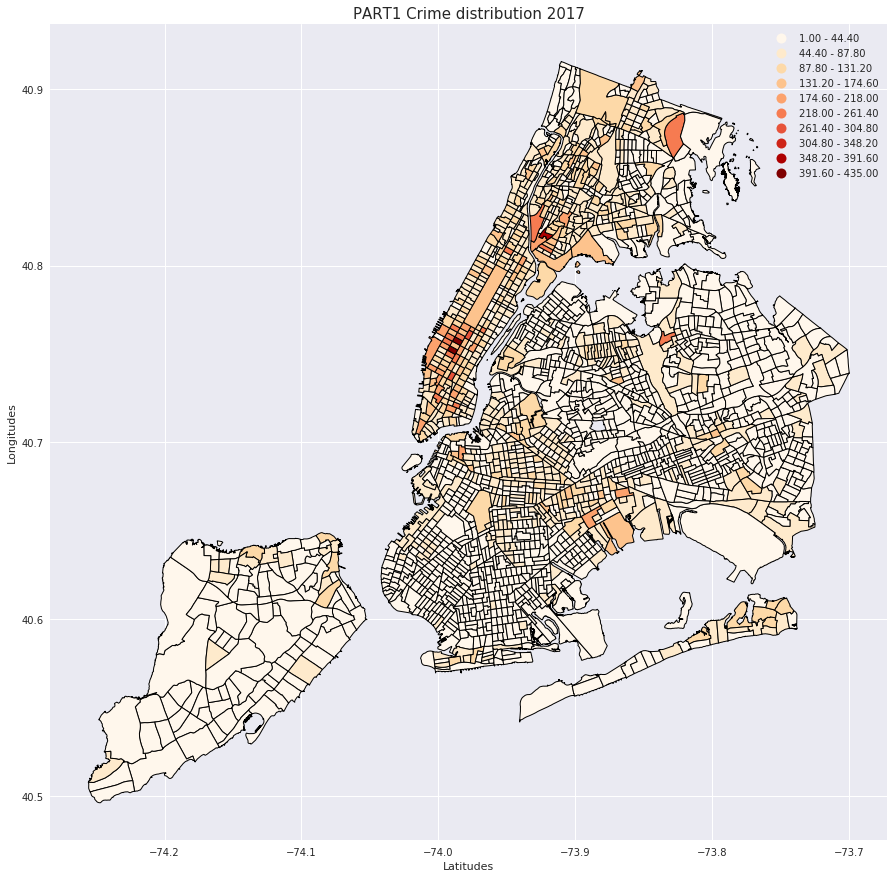

In [186]:
#### from matplotlib.colors import Normalize
from matplotlib import cm
f, ax = plt.subplots(figsize=(15,15))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
crime_temp_boro[crime_temp_boro['boro_ct201'] != '2000100'].plot(column='2017',cmap='OrRd',alpha=1,
                  lw=1, ax=ax, scheme="Equal_interval", edgecolor="black", legend=True, k=10)
#linkNYC.plot(ax=ax, marker='o', c="date_link_", 
             #markersize=5, cmap="OrRd")
#norm = Normalize(vmin=df_bars['Night1'].min(), vmax=df_bars['Night1'].max())
#n_cmap = cm.ScalarMappable(norm=norm, cmap='bone')
#n_cmap.set_array([])
#ax.get_figure().colorbar(n_cmap)
plt.title("PART1 Crime distribution 2017", size=15)
plt.ylabel('Longitudes')
plt.xlabel('Latitudes')
plt.show()

In [95]:
# start the for loop to create one map per year
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = crime_temp_boro[crime_temp_boro['boro_ct201'] != '2000100'].plot(column=year, cmap='OrRd', alpha=1,
                                                figsize=(15,15), linewidth=0.8, edgecolor='black', legend=True, k=10)
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Part1 crimes in NewYork', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # position the annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, year+'_crime.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

### Heatmaps - dayofWeek, timeofDay

In [96]:
import seaborn as sns

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [97]:
crime_temp.head()

,boro_ct201,CMPLNT_FR_DT,OFNS_DESC,YEAR,MONTH
0,5000900,2013-11-04,ROBBERY,2013,11
0,5000900,2008-05-20,ROBBERY,2008,5
0,5000900,2008-11-16,GRAND LARCENY,2008,11
0,5000900,2008-04-10,GRAND LARCENY,2008,4
0,5000900,2016-11-25,ROBBERY,2016,11


In [98]:
crime_temp['dayofWeek'] = crime_temp['CMPLNT_FR_DT'].dt.dayofweek

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [101]:
crime_dayweek = crime_temp.groupby(by=['OFNS_DESC', 'dayofWeek'], as_index=False).count()[['OFNS_DESC', 
                                                                                           'dayofWeek', 'boro_ct201']]

In [102]:
crime_dayweek.head(2)

,OFNS_DESC,dayofWeek,boro_ct201
0,ARSON,0,1836
1,ARSON,1,1663


In [106]:
piv_dayweek = pd.pivot_table(crime_dayweek, values="boro_ct201",index=["dayofWeek"], 
                             columns=["OFNS_DESC"], fill_value=0)

In [110]:
piv_dayweek.head()

OFNS_DESC,ARSON,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,ROBBERY
dayofWeek,,,,,,,,
0,1836,25679,24815,61124,12213,525,1676,27020
1,1663,25042,24259,60483,11857,490,1705,26134
2,1566,26459,24099,61037,11891,489,1636,26159
3,1595,25907,23984,61154,11870,474,1678,25530
4,1640,30600,26120,68551,13214,539,1921,27082


In [131]:
piv_dayweek_2 = (piv_dayweek - piv_dayweek.min()) / (piv_dayweek.max() - piv_dayweek.min())

In [132]:
piv_dayweek_2 = piv_dayweek_2.rename(index=str, columns={"FELONY ASSAULT": "ASSAULT", "GRAND LARCENY": "LARCENY",
                                         "GRAND LARCENY OF MOTOR VEHICLE": "AUTO THEFT", 
                                         "MURDER & NON-NEGL. MANSLAUGHTER": "MURDER"})
piv_dayweek_2

OFNS_DESC,ARSON,BURGLARY,ASSAULT,LARCENY,AUTO THEFT,MURDER,RAPE,ROBBERY
dayofWeek,,,,,,,,
0,0.553279,0.640278,0.082868,0.590460,0.346606,0.228700,0.066667,0.969015
1,0.198770,0.593713,0.027423,0.555114,0.114230,0.071749,0.115000,0.526237
2,0.000000,0.697295,0.011468,0.585663,0.136423,0.067265,0.000000,0.538731
3,0.059426,0.656944,0.000000,0.592115,0.122715,0.000000,0.070000,0.224388
4,0.151639,1.000000,0.213004,1.000000,1.000000,0.291480,0.475000,1.000000
5,0.331967,0.285746,0.890606,0.472126,0.349869,1.000000,1.000000,0.270365
6,1.000000,0.000000,1.000000,0.000000,0.000000,0.995516,0.876667,0.000000


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


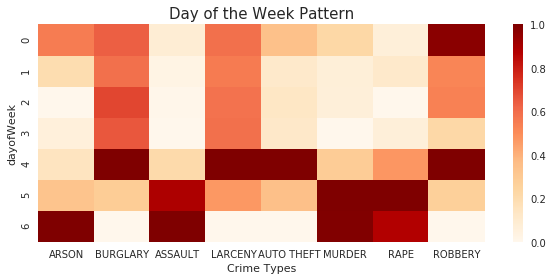

In [133]:
plt.figure(figsize=(10,4))
sns.heatmap(piv_dayweek_2, cmap='OrRd')
plt.title("Day of the Week Pattern", size=15)
#plt.ylabel('')
plt.xlabel('Crime Types')
plt.show()

### Part1 crimes Whole years

In [40]:
crime_nyc_part1.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,Date
index_right,,,,,,,,,,,,,,,,,,,,,
1,502279651,2013-03-06,03:30:00,03/06/2013,03:35:00,03/12/2013,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",...,NaN,STREET,NaN,NaN,1000883.0,236356.0,40.815411,-73.939911,"(40.815410927, -73.939911295)",2013-02-27
2,917945135,2013-03-05,16:05:00,03/05/2013,16:07:00,03/12/2013,109,GRAND LARCENY,419.0,"LARCENY,GRAND FROM PERSON,UNCL",...,INSIDE,BANK,NaN,NaN,982493.0,171934.0,40.638604,-74.006332,"(40.63860374, -74.00633215)",2013-02-26
10,922701841,2013-03-05,13:00:00,03/05/2013,15:00:00,03/12/2013,109,GRAND LARCENY,405.0,"LARCENY,GRAND BY THEFT OF CREDIT CARD",...,FRONT OF,RESIDENCE-HOUSE,NaN,NaN,1028254.0,149548.0,40.577050,-73.841595,"(40.577049716, -73.841595141)",2013-02-26
21,477304889,2013-03-04,17:00:00,NaN,NaN,03/12/2013,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",...,INSIDE,RESIDENCE-HOUSE,NaN,NaN,989354.0,184406.0,40.672835,-73.981602,"(40.67283536, -73.981601607)",2013-02-25
23,359922234,2013-03-04,14:00:00,03/06/2013,22:00:00,03/12/2013,109,GRAND LARCENY,403.0,"LARCENY,GRAND BY BANK ACCT COMPROMISE-REPRODUC...",...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,999459.0,174711.0,40.646213,-73.945195,"(40.646213127, -73.945195116)",2013-02-25


In [42]:
crime_nyc_all = crime_nyc_part1[['CMPLNT_FR_DT','Date', 'OFNS_DESC', 'Longitude', 'Latitude']]

In [43]:
crime_nyc_all.head()

,CMPLNT_FR_DT,Date,OFNS_DESC,Longitude,Latitude
index_right,,,,,
1,2013-03-06,2013-02-27,ROBBERY,-73.939911,40.815411
2,2013-03-05,2013-02-26,GRAND LARCENY,-74.006332,40.638604
10,2013-03-05,2013-02-26,GRAND LARCENY,-73.841595,40.577050
21,2013-03-04,2013-02-25,GRAND LARCENY,-73.981602,40.672835
23,2013-03-04,2013-02-25,GRAND LARCENY,-73.945195,40.646213


In [13]:
import geopandas as gpd
import shapely

In [44]:
# combine lat and lon to one column
crime_nyc_all['lonlat'] = list(zip(crime_nyc_all.Longitude, crime_nyc_all.Latitude))
# Create Point Geometry for based on lonlat column
crime_nyc_all['geometry'] = crime_nyc_all[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
crime_nyc_all.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,CMPLNT_FR_DT,Date,OFNS_DESC,Longitude,Latitude,lonlat,geometry
index_right,,,,,,,
1,2013-03-06,2013-02-27,ROBBERY,-73.939911,40.815411,"(-73.939911295, 40.815410927)",POINT (-73.939911295 40.81541092699999)
2,2013-03-05,2013-02-26,GRAND LARCENY,-74.006332,40.638604,"(-74.00633215, 40.63860374)",POINT (-74.00633215000001 40.63860374)
10,2013-03-05,2013-02-26,GRAND LARCENY,-73.841595,40.577050,"(-73.841595141, 40.577049716)",POINT (-73.841595141 40.577049716)
21,2013-03-04,2013-02-25,GRAND LARCENY,-73.981602,40.672835,"(-73.981601607, 40.67283536)",POINT (-73.981601607 40.67283536)
23,2013-03-04,2013-02-25,GRAND LARCENY,-73.945195,40.646213,"(-73.945195116, 40.646213127)",POINT (-73.94519511600001 40.646213127)


In [45]:
crime_nyc_all = gpd.GeoDataFrame(crime_nyc_all)

In [19]:
from fiona.crs import from_epsg

In [46]:
crime_nyc_all.crs = from_epsg(4326)
crime_nyc_all.crs

{'init': 'epsg:4326', 'no_defs': True}

In [47]:
crimeAll_with_tracks = gpd.sjoin(census_track, crime_nyc_all, op='contains')

In [48]:
crimeAll_with_tracks.head(2)

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,index_right,CMPLNT_FR_DT,Date,OFNS_DESC,Longitude,Latitude,lonlat
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,5704222,2013-11-04,2013-10-28,ROBBERY,-74.082073,40.644215,"(-74.082073348, 40.64421516)"
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,3402500,2008-05-20,2008-05-13,ROBBERY,-74.081943,40.644037,"(-74.081943405, 40.644036842)"


In [49]:
crimeAll_with_tracks.columns

Index(['boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry', 'index_right', 'CMPLNT_FR_DT', 'Date', 'OFNS_DESC',
       'Longitude', 'Latitude', 'lonlat'],
      dtype='object')

In [ ]:
## group by daily
## crimeAll_with_tracks.groupby(['CMPLNT_FR_DT', 'boro_ct201'])['OFNS_DESC'].count().unstack().reset_index()

In [54]:
crimeAll_weekly = crimeAll_with_tracks.groupby([pd.Grouper(key='Date', freq='W-MON'), 
                              'boro_ct201'])['OFNS_DESC'].count().unstack().reset_index().sort_values('Date')

In [74]:
crimeAll_weekly.head()

boro_ct201,Date,1000201,1000202,1000500,1000600,1000700,1000800,1000900,1001001,1001002,...,5027706,5027900,5029102,5029103,5029104,5030301,5030302,5031901,5031902,5032300
0,2007-12-31,1.0,4.0,NaN,1.0,4.0,3.0,3.0,1.0,2.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2008-01-07,1.0,NaN,NaN,NaN,4.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN
2,2008-01-14,NaN,1.0,NaN,NaN,2.0,2.0,2.0,NaN,1.0,...,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,2.0,1.0
3,2008-01-21,1.0,NaN,NaN,3.0,3.0,2.0,1.0,NaN,NaN,...,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
4,2008-01-28,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,1.0,...,NaN,NaN,1.0,1.0,NaN,1.0,NaN,2.0,2.0,1.0


In [68]:
crimeAll_weekly.sum(axis = 0, skipna = True).sort_values(ascending=False).head(5)

boro_ct201
1010900    5518.0
1011900    4639.0
4033402    3357.0
1005200    3068.0
1004900    3050.0
dtype: float64

In [71]:
crimeAll_weekly_data1 = crimeAll_weekly[['Date', '1010900', '1011900', '4033402', '1005200', '1004900']]

In [72]:
crimeAll_weekly_data1.head()

boro_ct201,Date,1010900,1011900,4033402,1005200,1004900
0,2007-12-31,6.0,16.0,7.0,9.0,6.0
1,2008-01-07,21.0,9.0,2.0,10.0,10.0
2,2008-01-14,14.0,7.0,4.0,5.0,9.0
3,2008-01-21,14.0,7.0,2.0,10.0,4.0
4,2008-01-28,11.0,9.0,6.0,3.0,8.0


In [73]:
##crimeAll_weekly_data1.to_csv('crimeAll_weekly_data1')

### Clustering

In [81]:
crime_Cluster = crimeAll_weekly.set_index('Date')

In [90]:
crime_Cluster = crime_Cluster.fillna(0)

In [93]:
crime_Cluster = crime_Cluster.transpose()

In [96]:
##the standardization
cluster = ((crime_Cluster.T - crime_Cluster.mean(1)) / crime_Cluster.std(1)).T

In [103]:
cluster.head()

Date,2007-12-31 00:00:00,2008-01-07 00:00:00,2008-01-14 00:00:00,2008-01-21 00:00:00,2008-01-28 00:00:00,2008-02-04 00:00:00,2008-02-11 00:00:00,2008-02-18 00:00:00,2008-02-25 00:00:00,2008-03-03 00:00:00,...,2017-10-23 00:00:00,2017-10-30 00:00:00,2017-11-06 00:00:00,2017-11-13 00:00:00,2017-11-20 00:00:00,2017-11-27 00:00:00,2017-12-04 00:00:00,2017-12-11 00:00:00,2017-12-18 00:00:00,2017-12-25 00:00:00
boro_ct201,,,,,,,,,,,,,,,,,,,,,
1000201,0.579597,0.579597,-0.718900,0.579597,-0.718900,-0.718900,-0.718900,0.579597,-0.718900,-0.718900,...,0.579597,0.579597,-0.718900,-0.718900,0.579597,-0.718900,-0.718900,0.579597,-0.718900,-0.718900
1000202,3.475683,-0.864763,0.220348,-0.864763,-0.864763,0.220348,-0.864763,0.220348,0.220348,-0.864763,...,-0.864763,-0.864763,0.220348,2.390572,-0.864763,0.220348,-0.864763,0.220348,-0.864763,-0.864763
1000500,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,...,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769
1000600,-0.546391,-1.252373,-1.252373,0.865571,-0.546391,-1.252373,-0.546391,-1.252373,-0.546391,-0.546391,...,0.159590,1.571552,0.159590,0.865571,2.277533,0.865571,0.159590,-0.546391,0.159590,0.865571
1000700,1.748323,1.748323,0.249760,0.999042,-0.499521,1.748323,1.748323,-0.499521,-0.499521,0.999042,...,-0.499521,-1.248802,0.249760,-0.499521,-0.499521,-1.248802,0.249760,0.999042,0.249760,-1.248802


In [75]:
from sklearn.cluster import KMeans

In [120]:
#kmeans with 5 clusters
km = KMeans(n_clusters=5, random_state=444)

In [121]:
km.fit(cluster)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=444, tol=0.0001,
    verbose=0)

In [138]:
km.labels_

array([3, 1, 1, ..., 2, 3, 0], dtype=int32)

In [123]:
predict=km.predict(cluster)
cluster['labels1'] = pd.Series(predict, index=cluster.index)

In [142]:
cluster.head()

Date,2007-12-31 00:00:00,2008-01-07 00:00:00,2008-01-14 00:00:00,2008-01-21 00:00:00,2008-01-28 00:00:00,2008-02-04 00:00:00,2008-02-11 00:00:00,2008-02-18 00:00:00,2008-02-25 00:00:00,2008-03-03 00:00:00,...,2017-10-30 00:00:00,2017-11-06 00:00:00,2017-11-13 00:00:00,2017-11-20 00:00:00,2017-11-27 00:00:00,2017-12-04 00:00:00,2017-12-11 00:00:00,2017-12-18 00:00:00,2017-12-25 00:00:00,labels1
boro_ct201,,,,,,,,,,,,,,,,,,,,,
1000201,0.579597,0.579597,-0.718900,0.579597,-0.718900,-0.718900,-0.718900,0.579597,-0.718900,-0.718900,...,0.579597,-0.718900,-0.718900,0.579597,-0.718900,-0.718900,0.579597,-0.718900,-0.718900,3
1000202,3.475683,-0.864763,0.220348,-0.864763,-0.864763,0.220348,-0.864763,0.220348,0.220348,-0.864763,...,-0.864763,0.220348,2.390572,-0.864763,0.220348,-0.864763,0.220348,-0.864763,-0.864763,1
1000500,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,...,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,-0.043769,1
1000600,-0.546391,-1.252373,-1.252373,0.865571,-0.546391,-1.252373,-0.546391,-1.252373,-0.546391,-0.546391,...,1.571552,0.159590,0.865571,2.277533,0.865571,0.159590,-0.546391,0.159590,0.865571,3
1000700,1.748323,1.748323,0.249760,0.999042,-0.499521,1.748323,1.748323,-0.499521,-0.499521,0.999042,...,-1.248802,0.249760,-0.499521,-0.499521,-1.248802,0.249760,0.999042,0.249760,-1.248802,2


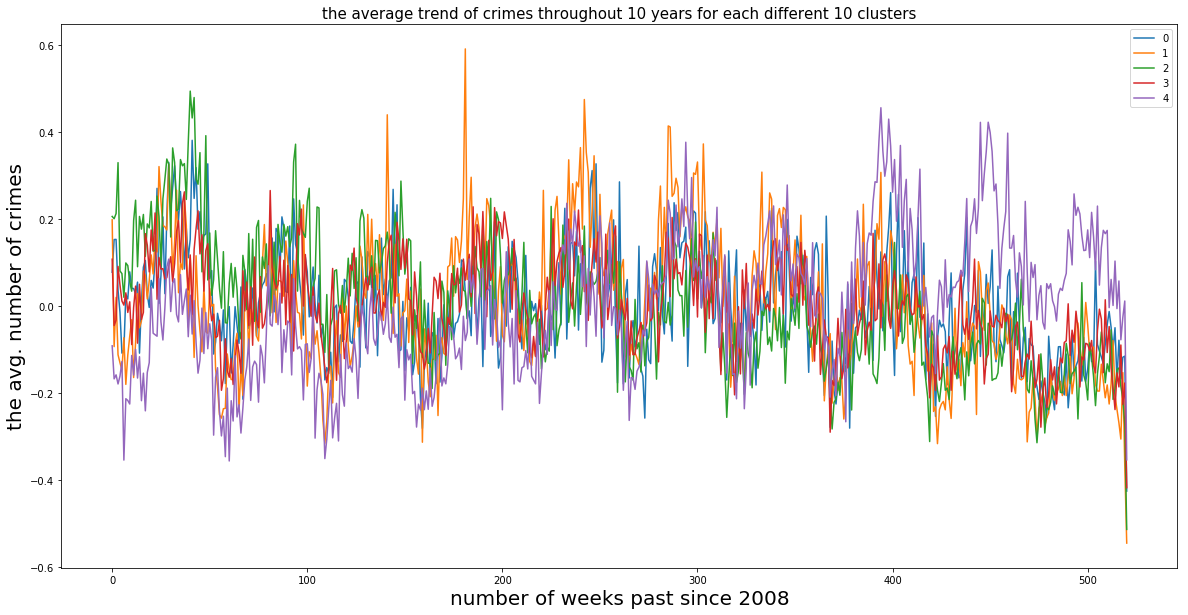

In [162]:
fig = plt.figure(figsize = (20,10))
for i in range(5):
    plt.plot(np.array(cluster[cluster['labels1'] == i].iloc[:,1:522].mean()), label = i)
    plt.legend()
plt.xlabel('number of weeks past since 2008', fontsize=20)
plt.ylabel('the avg. number of crimes', fontsize=20)
plt.title('the average trend of crimes throughout 10 years for each different 10 clusters', fontsize=15)
plt.show()

In [132]:
cluster_real = crime_Cluster.merge(cluster[['labels1']], left_index=True, right_index=True)

In [133]:
cluster_real.head()

Date,2007-12-31 00:00:00,2008-01-07 00:00:00,2008-01-14 00:00:00,2008-01-21 00:00:00,2008-01-28 00:00:00,2008-02-04 00:00:00,2008-02-11 00:00:00,2008-02-18 00:00:00,2008-02-25 00:00:00,2008-03-03 00:00:00,...,2017-10-30 00:00:00,2017-11-06 00:00:00,2017-11-13 00:00:00,2017-11-20 00:00:00,2017-11-27 00:00:00,2017-12-04 00:00:00,2017-12-11 00:00:00,2017-12-18 00:00:00,2017-12-25 00:00:00,labels1
boro_ct201,,,,,,,,,,,,,,,,,,,,,
1000201,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
1000202,4.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1000500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1000600,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,2.0,3.0,5.0,3.0,2.0,1.0,2.0,3.0,3
1000700,4.0,4.0,2.0,3.0,1.0,4.0,4.0,1.0,1.0,3.0,...,0.0,2.0,1.0,1.0,0.0,2.0,3.0,2.0,0.0,2


In [153]:
df0 = pd.DataFrame(data=cluster_real[cluster_real['labels1'] == 0].iloc[:,:522].sum())
df1 = pd.DataFrame(data=cluster_real[cluster_real['labels1'] == 1].iloc[:,:522].sum())
df2 = pd.DataFrame(data=cluster_real[cluster_real['labels1'] == 2].iloc[:,:522].sum())
df3 = pd.DataFrame(data=cluster_real[cluster_real['labels1'] == 3].iloc[:,:522].sum())
df4 = pd.DataFrame(data=cluster_real[cluster_real['labels1'] == 4].iloc[:,:522].sum())

In [172]:
df0 = df0.rename(columns={ df0.columns[0]: "Label0" })
df1 = df1.rename(columns={ df1.columns[0]: "Label1" })
df2 = df2.rename(columns={ df2.columns[0]: "Label2" })
df3 = df3.rename(columns={ df3.columns[0]: "Label3" })
df4 = df4.rename(columns={ df4.columns[0]: "Label4" })

In [178]:
df = df0.merge(df1, left_index=True, right_index=True)
df = df.merge(df2, left_index=True, right_index=True)
df = df.merge(df3, left_index=True, right_index=True)
df = df.merge(df4, left_index=True, right_index=True)

In [179]:
df.head()

,Label0,Label1,Label2,Label3,Label4
2007-12-31,375.0,392.0,760.0,521.0,422.0
2008-01-07,328.0,397.0,700.0,534.0,357.0
2008-01-14,350.0,307.0,657.0,456.0,331.0
2008-01-21,341.0,353.0,653.0,473.0,339.0
2008-01-28,320.0,307.0,726.0,521.0,323.0


In [180]:
##df.to_csv('df_clustered')

### Crime 2017

In [137]:
crime_nyc_2017 = crime_nyc[crime_nyc.CMPLNT_FR_DT.str[-4:] == '2017']

In [138]:
crime_nyc_2017 = crime_nyc_2017[['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'KY_CD', 'OFNS_DESC', 'LAW_CAT_CD',
                                 'Longitude', 'Latitude']]

In [60]:
crime_nyc_2017.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,OFNS_DESC,LAW_CAT_CD,Longitude,Latitude
1538308,12/31/2017,23:55:00,118,DANGEROUS WEAPONS,FELONY,-73.939666,40.639151
1538309,12/31/2017,23:30:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,-73.860463,40.891963
1538310,12/31/2017,23:10:00,578,HARRASSMENT 2,VIOLATION,-73.936810,40.794094
1538311,12/31/2017,23:05:00,118,DANGEROUS WEAPONS,FELONY,-73.909792,40.658444
1538312,12/31/2017,23:00:00,109,GRAND LARCENY,FELONY,-73.983263,40.761102


In [140]:
# combine lat and lon to one column
crime_nyc_2017['lonlat'] = list(zip(crime_nyc_2017.Longitude, crime_nyc_2017.Latitude))
# Create Point Geometry for based on lonlat column
crime_nyc_2017['geometry'] = crime_nyc_2017[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
crime_nyc_2017.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,OFNS_DESC,LAW_CAT_CD,Longitude,Latitude,lonlat,geometry
1538308,12/31/2017,23:55:00,118,DANGEROUS WEAPONS,FELONY,-73.939666,40.639151,"(-73.939666456, 40.639150769)",POINT (-73.939666456 40.639150769)
1538309,12/31/2017,23:30:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,-73.860463,40.891963,"(-73.860462659, 40.891963368)",POINT (-73.86046265899999 40.891963368)
1538310,12/31/2017,23:10:00,578,HARRASSMENT 2,VIOLATION,-73.936810,40.794094,"(-73.936810155, 40.794093725)",POINT (-73.936810155 40.794093725)
1538311,12/31/2017,23:05:00,118,DANGEROUS WEAPONS,FELONY,-73.909792,40.658444,"(-73.909791753, 40.658443523)",POINT (-73.90979175300001 40.658443523)
1538312,12/31/2017,23:00:00,109,GRAND LARCENY,FELONY,-73.983263,40.761102,"(-73.983262987, 40.761101623)",POINT (-73.983262987 40.761101623)


In [141]:
crime_nyc_2017 = gpd.GeoDataFrame(crime_nyc_2017)

In [17]:
from fiona.crs import from_epsg

In [142]:
crime_nyc_2017.crs = from_epsg(4326)
crime_nyc_2017.crs

{'init': 'epsg:4326', 'no_defs': True}

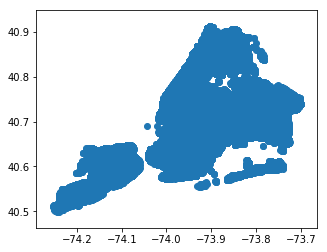

In [64]:
crime_nyc_2017.plot()
plt.show()

In [89]:
# url = "https://data.cityofnewyork.us/api/geospatial/v2h8-6mxf?method=export&format=Shapefile"

In [90]:
# urlb.request.urlretrieve(url, "file.gz")

('file.gz', <http.client.HTTPMessage at 0x7f4e57cc6208>)

In [91]:
# !unzip file.gz

Archive:  file.gz
  inflating: geo_export_b53baefe-6375-46eb-8e83-144c3913a376.dbf  
  inflating: geo_export_b53baefe-6375-46eb-8e83-144c3913a376.shp  
  inflating: geo_export_b53baefe-6375-46eb-8e83-144c3913a376.shx  
  inflating: geo_export_b53baefe-6375-46eb-8e83-144c3913a376.prj  


In [65]:
census_block = gpd.GeoDataFrame.from_file("geo_export_b53baefe-6375-46eb-8e83-144c3913a376.shp")
census_block.head()

,bctcb2010,boro_code,boro_name,cb2010,ct2010,shape_area,shape_leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,POLYGON ((-74.07920577013245 40.64343078374567...
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438017 40.61085506705416...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910642 40.62600632452712...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,POLYGON ((-74.08708799689826 40.61116883123925...
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511992 40.60100160655585...


In [156]:
# url2 = 'https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile'

In [157]:
# urlb.request.urlretrieve(url2, "file2.gz")

('file2.gz', <http.client.HTTPMessage at 0x7f4e58028860>)

In [158]:
# !unzip file2.gz

Archive:  file2.gz
  inflating: geo_export_528e5298-ab8f-4cf6-b6ad-de2f22d1f1a0.dbf  
  inflating: geo_export_528e5298-ab8f-4cf6-b6ad-de2f22d1f1a0.shp  
  inflating: geo_export_528e5298-ab8f-4cf6-b6ad-de2f22d1f1a0.shx  
  inflating: geo_export_528e5298-ab8f-4cf6-b6ad-de2f22d1f1a0.prj  


In [15]:
census_track = gpd.GeoDataFrame.from_file("geo_export_528e5298-ab8f-4cf6-b6ad-de2f22d1f1a0.shp")
census_track.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...


In [67]:
census_block.crs = from_epsg(4326)
census_block.crs

{'init': 'epsg:4326', 'no_defs': True}

In [21]:
census_track.crs = from_epsg(4326)
census_track.crs

{'init': 'epsg:4326', 'no_defs': True}

In [69]:
crime2017_with_blocks = gpd.sjoin(census_block, crime_nyc_2017, op='contains')

In [143]:
crime2017_with_tracks = gpd.sjoin(census_track, crime_nyc_2017, op='contains')

In [144]:
part1_2017 = crime2017_with_tracks[crime2017_with_tracks.OFNS_DESC.isin(['BURGLARY', 'ARSON', 
                                                    'GRAND LARCENY', 'ROBBERY',
                                                    'GRAND LARCENY OF MOTOR VEHICLE', 'FELONY ASSAULT', 
                                                    'RAPE', 
                                                    'MURDER & NON-NEGL. MANSLAUGHTER'])]

In [72]:
part1_2017.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,...,geometry,index_right,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,OFNS_DESC,LAW_CAT_CD,Longitude,Latitude,lonlat
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,POLYGON ((-74.07920577013245 40.64343078374567...,1720863,08/13/2017,08:00:00,106,FELONY ASSAULT,FELONY,-74.081169,40.644095,"(-74.081168738, 40.644095032)"
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,POLYGON ((-74.07920577013245 40.64343078374567...,1743758,07/27/2017,09:05:00,105,ROBBERY,FELONY,-74.082225,40.644435,"(-74.082224962, 40.644434635)"
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,POLYGON ((-74.07920577013245 40.64343078374567...,1650099,09/23/2017,05:00:00,109,GRAND LARCENY,FELONY,-74.083570,40.642680,"(-74.083570455, 40.642679747)"
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,POLYGON ((-74.07920577013245 40.64343078374567...,1667221,09/22/2017,01:30:00,109,GRAND LARCENY,FELONY,-74.083570,40.642680,"(-74.083570455, 40.642679747)"
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,POLYGON ((-74.07920577013245 40.64343078374567...,1943667,02/21/2017,19:00:00,106,FELONY ASSAULT,FELONY,-74.083570,40.642680,"(-74.083570455, 40.642679747)"


In [92]:
part1_2017.columns

Index(['boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry', 'index_right', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'KY_CD',
       'OFNS_DESC', 'LAW_CAT_CD', 'Longitude', 'Latitude', 'lonlat'],
      dtype='object')

In [182]:
felony_2017 = crime2017_with_tracks[crime2017_with_tracks['LAW_CAT_CD'] == 'FELONY']

In [170]:
part1_2017_hist = part1_2017.groupby('OFNS_DESC').count()[['boro_ct201']].reset_index().sort_values(by = 'boro_ct201', 
                                                                                   ascending=False)

In [177]:
part1_2017_hist['crime_list'] = ['LARCENY', 'ASSAULT', 'ROBBERY', 'BURGLARY', 
                                 'AUTO THEFT', 'RAPE', 'ARSON', 'MURDER']

In [178]:
part1_2017_hist.head()

,OFNS_DESC,boro_ct201,crime_list
3,GRAND LARCENY,40930,LARCENY
2,FELONY ASSAULT,20008,ASSAULT
7,ROBBERY,13960,ROBBERY
1,BURGLARY,11990,BURGLARY
4,GRAND LARCENY OF MOTOR VEHICLE,5573,AUTO THEFT


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


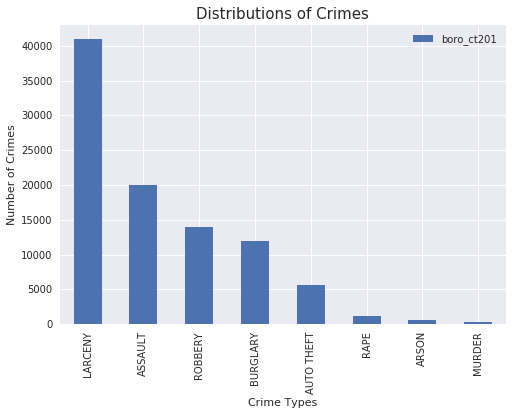

In [187]:
#part1_2017_hist.sort_values('importances',inplace=True)
part1_2017_hist.plot(kind='bar',y='boro_ct201', x='crime_list')
plt.title("Distributions of Crimes", size=15)
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Types')
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


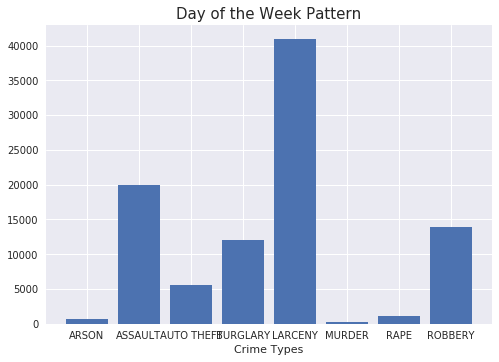

In [182]:
plt.bar(crime_list, part1_2017_hist['boro_ct201'])
plt.title("Day of the Week Pattern", size=15)
plt.ylabel('')
plt.xlabel('Crime Types')
plt.show()

In [76]:
ct_2017 = part1_2017.groupby(['boro_ct201', 'OFNS_DESC'])['OFNS_DESC'].count().unstack().reset_index()

In [77]:
len(ct_2017)

2152

In [79]:
ct_2017['CRIME_SUM'] = ct_2017[['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,
                    'GRAND LARCENY OF MOTOR VEHICLE',
                    'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']].sum(axis = 1, skipna = True) 

In [80]:
ct_2017.head()

OFNS_DESC,boro_ct201,ARSON,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,ROBBERY,CRIME_SUM
0,1000201,NaN,NaN,8.0,9.0,NaN,NaN,NaN,3.0,20.0
1,1000202,NaN,5.0,9.0,17.0,2.0,NaN,NaN,4.0,37.0
2,1000600,NaN,16.0,25.0,40.0,1.0,NaN,NaN,25.0,107.0
3,1000700,NaN,3.0,6.0,54.0,2.0,NaN,NaN,5.0,70.0
4,1000800,NaN,13.0,10.0,33.0,NaN,NaN,NaN,12.0,68.0


#### Note

 - number of part1 ~ 95K
 - number of census track ~ 2100

In [82]:
ct_2017 = ct_2017.merge(census_track, left_on="boro_ct201", right_on='boro_ct201')
ct_2017.head()

OFNS_DESC,boro_ct201,ARSON,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,ROBBERY,CRIME_SUM,...,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,1000201,NaN,NaN,8.0,9.0,NaN,NaN,NaN,3.0,20.0,...,Manhattan,E,000201,2.01,MN28,Lower East Side,3809,9.715994e+05,4748.325960,POLYGON ((-73.98449647076764 40.70950966393941...
1,1000202,NaN,5.0,9.0,17.0,2.0,NaN,NaN,4.0,37.0,...,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315114e+06,8568.089235,(POLYGON ((-73.98237340572007 40.7055433504376...
2,1000600,NaN,16.0,25.0,40.0,1.0,NaN,NaN,25.0,107.0,...,Manhattan,E,000600,6,MN28,Lower East Side,3809,2.583418e+06,6970.634699,POLYGON ((-73.99022012603876 40.71440493989796...
3,1000700,NaN,3.0,6.0,54.0,2.0,NaN,NaN,5.0,70.0,...,Manhattan,I,000700,7,MN25,Battery Park City-Lower Manhattan,3810,2.442012e+06,9802.917997,(POLYGON ((-73.99799957540132 40.6987976855442...
4,1000800,NaN,13.0,10.0,33.0,NaN,NaN,NaN,12.0,68.0,...,Manhattan,E,000800,8,MN27,Chinatown,3809,2.366871e+06,6362.785762,POLYGON ((-73.99190544366451 40.70952539658225...


In [89]:
ct_2017[ct_2017['CRIME_SUM'] > 250].sort_values(by = 'CRIME_SUM', ascending=False)

OFNS_DESC,boro_ct201,ARSON,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,ROBBERY,CRIME_SUM,...,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
105,1010900,1.0,51.0,17.0,346.0,3.0,NaN,NaN,17.0,435.0,...,Manhattan,I,010900,109,MN17,Midtown-Midtown South,3807,1.891365e+06,5703.531520,POLYGON ((-73.98594653087758 40.75231680555549...
118,1011900,2.0,10.0,44.0,323.0,1.0,1.0,NaN,22.0,403.0,...,Manhattan,I,011900,119,MN17,Midtown-Midtown South,3807,1.911311e+06,5722.090339,POLYGON ((-73.98225528672133 40.75738736489549...
286,2000100,8.0,NaN,361.0,1.0,NaN,NaN,NaN,2.0,372.0,...,Bronx,I,000100,1,BX98,Rikers Island,3710,1.816383e+07,18898.116621,POLYGON ((-73.87287195903875 40.78597502780474...
324,2006500,2.0,25.0,88.0,168.0,8.0,NaN,NaN,65.0,356.0,...,Bronx,I,006500,65,BX34,Melrose South-Mott Haven North,3710,2.816028e+06,9811.640279,"POLYGON ((-73.9159913012154 40.8172115676259, ..."
48,1005200,NaN,20.0,16.0,233.0,NaN,NaN,NaN,13.0,282.0,...,Manhattan,I,005200,52,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3807,1.815429e+06,5790.388169,POLYGON ((-73.98730154868954 40.73890302603643...
101,1010400,1.0,7.0,4.0,241.0,NaN,NaN,NaN,12.0,265.0,...,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...
113,1011402,NaN,29.0,8.0,201.0,2.0,NaN,NaN,17.0,257.0,...,Manhattan,I,011402,114.02,MN40,Upper East Side-Carnegie Hill,3805,1.063547e+06,4125.256029,POLYGON ((-73.96475544914023 40.76405707059968...
46,1004900,NaN,16.0,9.0,217.0,1.0,NaN,NaN,13.0,256.0,...,Manhattan,I,004900,49,MN24,SoHo-TriBeCa-Civic Center-Little Italy,3810,2.226124e+06,6676.606066,"POLYGON ((-73.9999157921724 40.72693471343446,..."
72,1007600,NaN,24.0,18.0,191.0,1.0,1.0,NaN,18.0,253.0,...,Manhattan,I,007600,76,MN17,Midtown-Midtown South,3807,1.873518e+06,5717.633510,POLYGON ((-73.98407636095357 40.74910212538399...


In [84]:
ct_2017 = gpd.GeoDataFrame(ct_2017)

In [91]:
ct_2017.columns

Index(['boro_ct201', 'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'RAPE', 'ROBBERY', 'CRIME_SUM', 'boro_code', 'boro_name', 'cdeligibil',
       'ct2010', 'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area',
       'shape_leng', 'geometry'],
      dtype='object', name='OFNS_DESC')

In [2]:
ct_2017.head()

NameError: name 'ct_2017' is not defined

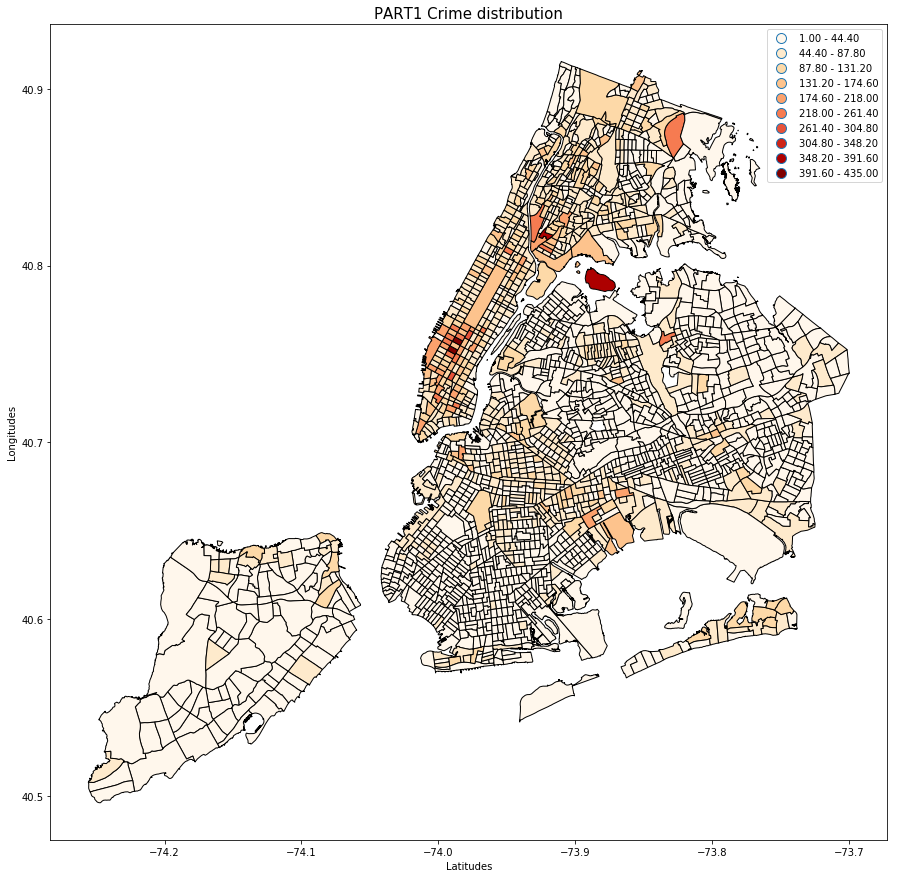

In [85]:
#### from matplotlib.colors import Normalize
from matplotlib import cm
f, ax = plt.subplots(figsize=(15,15))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
ct_2017.plot(column='CRIME_SUM',cmap='OrRd',alpha=1,
                  lw=1, ax=ax, scheme="Equal_interval", edgecolor="black", legend=True, k=10)
#linkNYC.plot(ax=ax, marker='o', c="date_link_", 
             #markersize=5, cmap="OrRd")
#norm = Normalize(vmin=df_bars['Night1'].min(), vmax=df_bars['Night1'].max())
#n_cmap = cm.ScalarMappable(norm=norm, cmap='bone')
#n_cmap.set_array([])
#ax.get_figure().colorbar(n_cmap)
plt.title("PART1 Crime distribution", size=15)
plt.ylabel('Longitudes')
plt.xlabel('Latitudes')
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


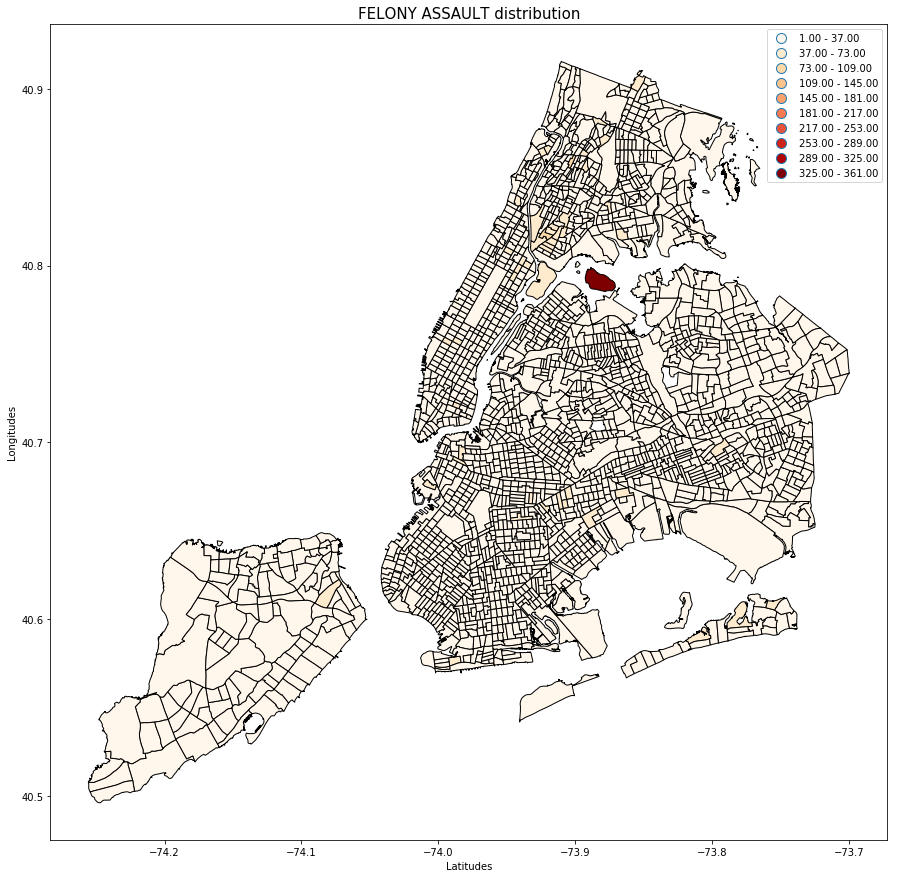

In [198]:
#### from matplotlib.colors import Normalize
from matplotlib import cm
f, ax = plt.subplots(figsize=(15,15))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
ct_2017.plot(column='FELONY ASSAULT',cmap='OrRd',alpha=1,
                  lw=1, ax=ax, scheme="Equal_interval", edgecolor="black", legend=True, k=10)
#linkNYC.plot(ax=ax, marker='o', c="date_link_", 
             #markersize=5, cmap="OrRd")
#norm = Normalize(vmin=df_bars['Night1'].min(), vmax=df_bars['Night1'].max())
#n_cmap = cm.ScalarMappable(norm=norm, cmap='bone')
#n_cmap.set_array([])
#ax.get_figure().colorbar(n_cmap)
plt.title("FELONY ASSAULT distribution", size=15)
plt.ylabel('Longitudes')
plt.xlabel('Latitudes')
plt.show()

In [204]:
ny_poverty = pd.read_csv('new_york_poverty.csv', skiprows=1)

In [242]:
kings_poverty = pd.read_csv('kings_poverty.csv', skiprows=1)

In [219]:
bronx_poverty = pd.read_csv('bronx_poverty.csv', skiprows=1)

In [220]:
queens_poverty = pd.read_csv('queens_poverty.csv', skiprows=1)

In [221]:
richmond_poverty = pd.read_csv('richmond_poverty.csv', skiprows=1)

In [244]:
kings_poverty = kings_poverty[[1,5]]
kings_poverty['Id2'] = kings_poverty.Id2.astype(str).str[4:]
kings_poverty.head()

,Id2,All families - Percent below poverty level; Estimate; Families
0,7000100,0.0
1,7000200,27.5
2,7000301,0.0
3,7000501,2.5
4,7000502,0.0


In [245]:
ny_poverty = ny_poverty[[1,5]]
ny_poverty['Id2'] = ny_poverty.Id2.astype(str).str[4:]

bronx_poverty = bronx_poverty[[1,5]]
bronx_poverty['Id2'] = bronx_poverty.Id2.astype(str).str[4:]

queens_poverty = queens_poverty[[1,5]]
queens_poverty['Id2'] = queens_poverty.Id2.astype(str).str[4:]

richmond_poverty = richmond_poverty[[1,5]]
richmond_poverty['Id2'] = richmond_poverty.Id2.astype(str).str[4:]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [258]:
poverty = ny_poverty
poverty = poverty.append(kings_poverty)
poverty = poverty.append(bronx_poverty)
poverty = poverty.append(queens_poverty)
poverty = poverty.append(richmond_poverty)

In [262]:
poverty['pov_perc'] = poverty[[1]]

In [266]:
poverty = poverty[[0,2]]
poverty.head()

,Id2,pov_perc
0,1000100,-
1,1000201,41.1
2,1000202,18.8
3,1000500,-
4,1000600,34.5


In [286]:
poverty[poverty['Id2'] == '1000600']

,Id2,pov_perc
4,1000600,34.5
3,1000600,4.9


In [284]:
len(poverty[poverty['pov_perc'] == '-'])

52

In [273]:
ct_poverty = ct_2017.merge(poverty, how = 'left', left_on="boro_ct201", right_on='Id2')

In [283]:
ct_poverty

OFNS_DESC,boro_ct201,BURGLARY,FELONY ASSAULT,GRAND LARCENY,MISCELLANEOUS PENAL LAW,ROBBERY,boro_code,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,Id2,pov_perc
0,1000201,NaN,8.0,9.0,1.0,3.0,1,Manhattan,E,000201,2.01,MN28,Lower East Side,3809,9.715994e+05,4748.325960,POLYGON ((-73.98449647076764 40.70950966393941...,1000201,41.1
1,1000202,5.0,9.0,17.0,9.0,4.0,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315114e+06,8568.089235,(POLYGON ((-73.98237340572007 40.7055433504376...,1000202,18.8
2,1000600,16.0,25.0,40.0,9.0,25.0,1,Manhattan,E,000600,6,MN28,Lower East Side,3809,2.583418e+06,6970.634699,POLYGON ((-73.99022012603876 40.71440493989796...,1000600,34.5
3,1000600,16.0,25.0,40.0,9.0,25.0,1,Manhattan,E,000600,6,MN28,Lower East Side,3809,2.583418e+06,6970.634699,POLYGON ((-73.99022012603876 40.71440493989796...,1000600,4.9
4,1000700,3.0,6.0,54.0,2.0,5.0,1,Manhattan,I,000700,7,MN25,Battery Park City-Lower Manhattan,3810,2.442012e+06,9802.917997,(POLYGON ((-73.99799957540132 40.6987976855442...,1000700,0.0
5,1000700,3.0,6.0,54.0,2.0,5.0,1,Manhattan,I,000700,7,MN25,Battery Park City-Lower Manhattan,3810,2.442012e+06,9802.917997,(POLYGON ((-73.99799957540132 40.6987976855442...,1000700,3.3
6,1000800,13.0,10.0,33.0,8.0,12.0,1,Manhattan,E,000800,8,MN27,Chinatown,3809,2.366871e+06,6362.785762,POLYGON ((-73.99190544366451 40.70952539658225...,1000800,23.6
7,1000800,13.0,10.0,33.0,8.0,12.0,1,Manhattan,E,000800,8,MN27,Chinatown,3809,2.366871e+06,6362.785762,POLYGON ((-73.99190544366451 40.70952539658225...,1000800,15.5
8,1000900,4.0,13.0,69.0,5.0,6.0,1,Manhattan,I,000900,9,MN25,Battery Park City-Lower Manhattan,3810,3.122059e+06,16484.098901,(POLYGON ((-74.00078295275675 40.6942865156646...,1000900,2.5
9,1001001,NaN,NaN,5.0,NaN,NaN,1,Manhattan,I,001001,10.01,MN28,Lower East Side,3809,8.678059e+05,3924.786593,POLYGON ((-73.97518850986306 40.71450316072391...,1001001,3.5
